In [1]:
# the first step is to import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  # this is to adjust the connfiguration of the plots we will create

# Now is time to read in the dataset

df= pd.read_csv(r'C:\Users\Claude Fotso\Downloads\movies.csv')

In [2]:
# Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Looking if there are missing data to be cleaned

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing)) 

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
 # Identify the data types for the columns
    
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
# Drop rows with empty values under 'gross'

df['gross'].replace('', np.nan, inplace=True)
df.dropna(subset=['gross'], inplace=True)


In [6]:
# Sorting the dataset by gross

df = df.sort_values(by=['gross'], inplace=False, ascending=False)
                                

In [7]:
pd.set_option('display.max_rows', None)

In [33]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False).head()

7129    2275
5664    2274
6412    2273
4007    2272
6793    2271
Name: company, dtype: int16

In [ ]:
# Budget High corrrelation
# Company high correlation


<function matplotlib.pyplot.show(close=None, block=None)>

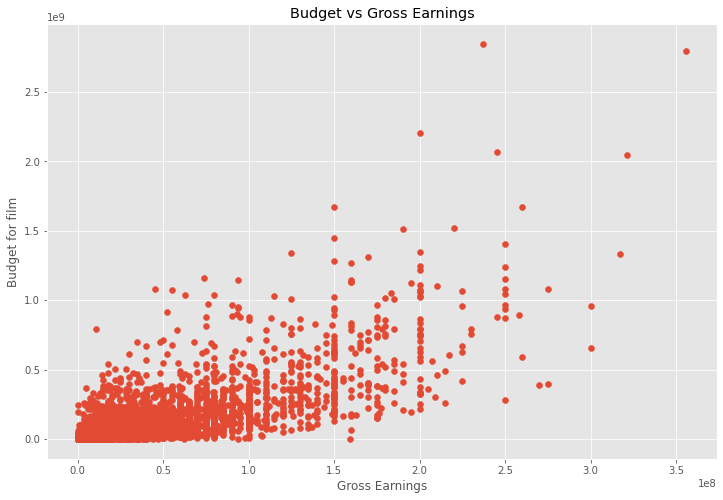

In [9]:
# Building a scatterplot with budget and revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
plt.show

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

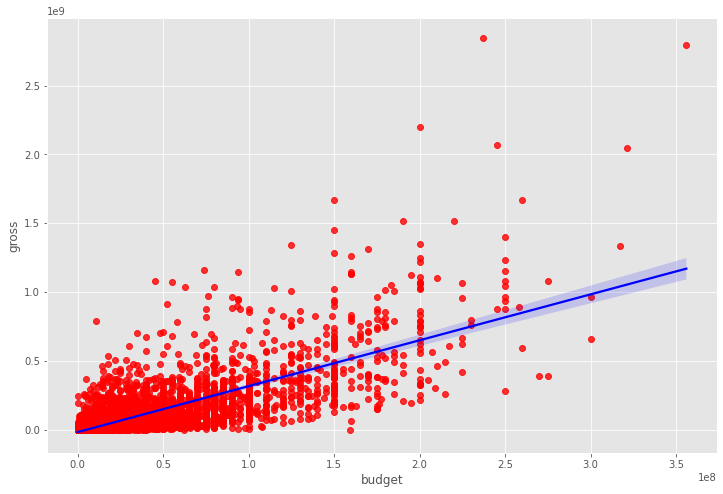

In [11]:
#Will be plotting budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [13]:
# Lets start looking at correlation. Can be done using pearson,kendall or spearman
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.091821,0.215740,0.327781,0.257486,0.114706
score,0.091821,1.000000,0.413096,0.071792,0.186258,0.397321
votes,0.215740,0.413096,1.000000,0.440021,0.630757,0.309536
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.114706,0.397321,0.309536,0.318595,0.245216,1.000000


In [ ]:
# There is a high correlation between budget and gross

Text(87.0, 0.5, 'Movie Features')

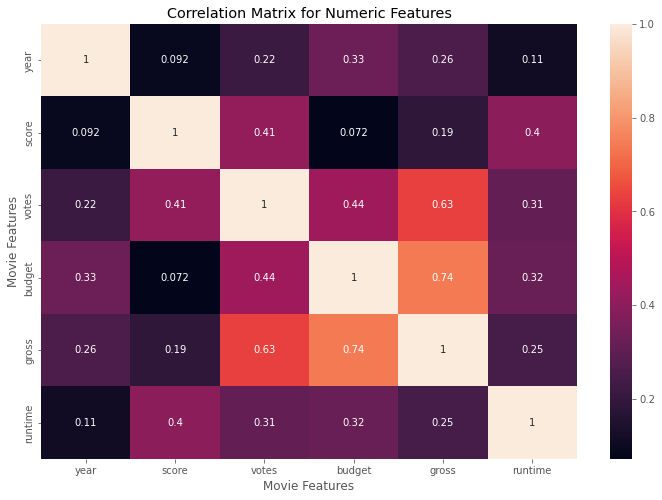

In [14]:
correlatio_matrix = df.corr(method='pearson')

sns.heatmap(correlatio_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [29]:
#Looking at company: Note that company is not numeric so will creatig a numeric representation of it so it can be included in the correlation matric
 
df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,519,5,0,2009,683,7.8,1100000.0,1116,1719,2233,53,237000000.0,2.847246e+09,2148,162.0
7445,521,5,0,2019,179,8.4,903000.0,161,717,2141,53,356000000.0,2.797501e+09,1532,181.0
3045,6727,5,6,1997,691,7.8,1100000.0,1116,1719,1524,53,200000000.0,2.201647e+09,2148,194.0
6663,5008,5,0,2015,685,7.8,876000.0,1086,2468,504,53,245000000.0,2.069522e+09,1470,138.0
7244,522,5,0,2018,188,8.4,897000.0,161,717,2141,53,321000000.0,2.048360e+09,1532,149.0


In [30]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,519,5,0,2009,683,7.8,1100000.0,1116,1719,2233,53,237000000.0,2.847246e+09,2148,162.0
7445,521,5,0,2019,179,8.4,903000.0,161,717,2141,53,356000000.0,2.797501e+09,1532,181.0
3045,6727,5,6,1997,691,7.8,1100000.0,1116,1719,1524,53,200000000.0,2.201647e+09,2148,194.0
6663,5008,5,0,2015,685,7.8,876000.0,1086,2468,504,53,245000000.0,2.069522e+09,1470,138.0
7244,522,5,0,2018,188,8.4,897000.0,161,717,2141,53,321000000.0,2.048360e+09,1532,149.0


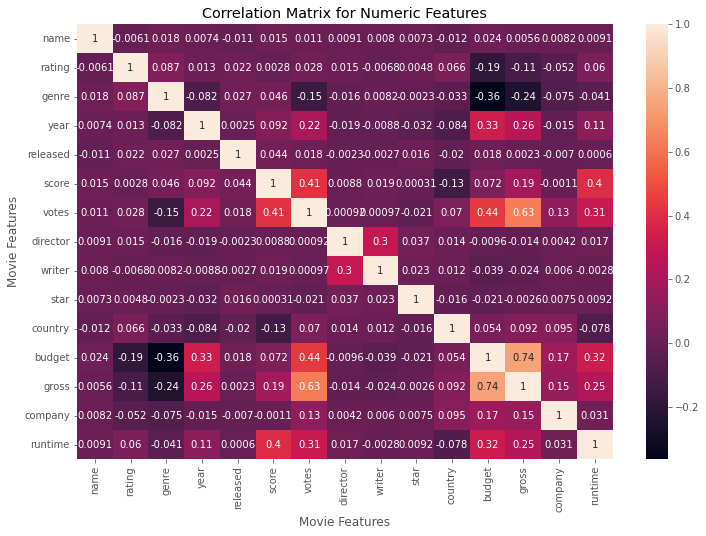

In [20]:
correlatio_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlatio_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [21]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.006091,0.017885,0.007404,-0.011033,0.015473,0.011429,0.009092,0.008008,0.007278,-0.012027,0.023630,0.005557,0.008155,0.009142
rating,-0.006091,1.000000,0.087325,0.012776,0.022026,0.002766,0.028082,0.014723,-0.006793,0.004774,0.066465,-0.187347,-0.107339,-0.052477,0.059870
genre,0.017885,0.087325,1.000000,-0.082252,0.026804,0.046093,-0.149289,-0.016412,0.008231,-0.002322,-0.033283,-0.363257,-0.243059,-0.074570,-0.041023
year,0.007404,0.012776,-0.082252,1.000000,0.002465,0.091821,0.215740,-0.019116,-0.008780,-0.032319,-0.084488,0.327781,0.257486,-0.014883,0.114706
released,-0.011033,0.022026,0.026804,0.002465,1.000000,0.044301,0.018043,-0.002315,-0.002699,0.015812,-0.020083,0.018319,0.002341,-0.007031,0.000605
score,0.015473,0.002766,0.046093,0.091821,0.044301,1.000000,0.413096,0.008810,0.018648,0.000310,-0.129474,0.071792,0.186258,-0.001107,0.397321
votes,0.011429,0.028082,-0.149289,0.215740,0.018043,0.413096,1.000000,0.000919,0.000972,-0.021274,0.069934,0.440021,0.630757,0.131020,0.309536
director,0.009092,0.014723,-0.016412,-0.019116,-0.002315,0.008810,0.000919,1.000000,0.297601,0.036794,0.014435,-0.009593,-0.014490,0.004213,0.016942
writer,0.008008,-0.006793,0.008231,-0.008780,-0.002699,0.018648,0.000972,0.297601,1.000000,0.023374,0.011871,-0.039188,-0.023574,0.005972,-0.002816
star,0.007278,0.004774,-0.002322,-0.032319,0.015812,0.000310,-0.021274,0.036794,0.023374,1.000000,-0.016192,-0.020515,-0.002602,0.007518,0.009227


In [32]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.006091
      genre       0.017885
      year        0.007404
      released   -0.011033
dtype: float64

In [31]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.363257
budget  genre    -0.363257
genre   gross    -0.243059
gross   genre    -0.243059
rating  budget   -0.187347
dtype: float64

In [28]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes     gross       0.630757
gross     votes       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Budget and votes have the highest correlation to gross